In [118]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [119]:
df = load_diabetes()
df.data
df.target
df.keys()
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [120]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPreassure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv(url, names=columns)

In [121]:
df.head()

,Pregnancies,Glucose,BloodPreassure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPreassure            768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [123]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPreassure              0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [124]:
df.describe()

,Pregnancies,Glucose,BloodPreassure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [125]:
col_with_zero_values = ['Glucose','BloodPreassure','SkinThickness','Insulin','BMI']
df[col_with_zero_values] = df[col_with_zero_values].replace(0, np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPreassure               35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [126]:
df.fillna(df.mean(), inplace = True)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPreassure              0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [127]:
X = df.drop(columns=['Outcome'], axis = 1)
y= df['Outcome']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
print(f"Training Shpae : {X_train.shape}")
print(f"Test Shpae : {X_test.shape}")

Training Shpae : (537, 8)
Test Shpae : (231, 8)


In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import optuna
from optuna.visualization import plot_contour 
import plotly

def objective(trial):
    ## Suggest values for hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    
    model = RandomForestClassifier(
        n_estimators = n_estimators,
        max_depth = max_depth
    )
    
    score = cross_val_score(model, X_train, y_train, cv = 3, scoring = 'accuracy').mean()
    
    return score

In [131]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials=50)

[I 2025-01-19 17:51:19,154] A new study created in memory with name: no-name-fb0ea2d1-9f8f-49ba-96f0-e350d9a57f36
[I 2025-01-19 17:51:19,321] Trial 0 finished with value: 0.7597765363128491 and parameters: {'n_estimators': 83, 'max_depth': 14}. Best is trial 0 with value: 0.7597765363128491.
[I 2025-01-19 17:51:19,480] Trial 1 finished with value: 0.7616387337057727 and parameters: {'n_estimators': 84, 'max_depth': 12}. Best is trial 1 with value: 0.7616387337057727.
[I 2025-01-19 17:51:19,638] Trial 2 finished with value: 0.7653631284916201 and parameters: {'n_estimators': 86, 'max_depth': 8}. Best is trial 2 with value: 0.7653631284916201.
[I 2025-01-19 17:51:19,804] Trial 3 finished with value: 0.7616387337057727 and parameters: {'n_estimators': 87, 'max_depth': 15}. Best is trial 2 with value: 0.7653631284916201.
[I 2025-01-19 17:51:20,032] Trial 4 finished with value: 0.7616387337057727 and parameters: {'n_estimators': 122, 'max_depth': 15}. Best is trial 2 with value: 0.765363128

In [132]:
print(f"Best trial accuracy : {study.best_trial.values}")
print(f"Best trial accuracy : {study.best_trial.params}")

Best trial accuracy : [0.7802607076350093]
Best trial accuracy : {'n_estimators': 93, 'max_depth': 5}


In [133]:
try:
    from optuna.visualization import plot_contour
    plot_contour(study).show()
except ImportError as e:
    print(f"ImportError: {e}")
except Exception as e:
    print(f"Other Error: {e}")

ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.


In [134]:
plot_contour(study).show()

ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.

/var/folders/vt/hgv58_ws0rjfsg_1d8fcxgww0000gn/T/ipykernel_82787/891353567.py:2: ExperimentalWarning:

plot_contour is experimental (supported from v2.2.0). The interface can change in the future.

[W 2025-01-19 10:07:22,208] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


<Axes: title={'center': 'Contour Plot'}, xlabel='x', ylabel='y'>

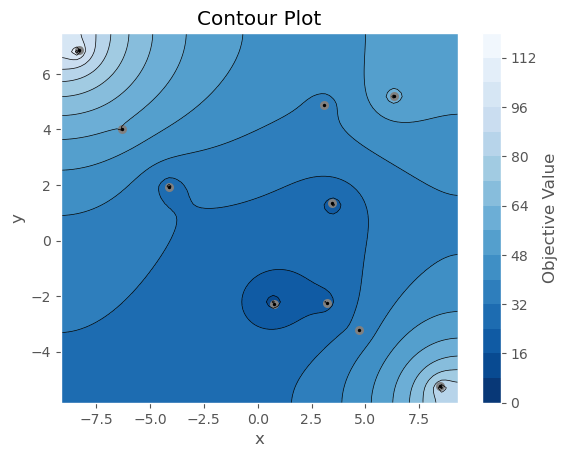

In [117]:
from optuna.visualization.matplotlib import plot_contour
plot_contour(study)

In [52]:
from sklearn.metrics import accuracy_score
best_model = RandomForestClassifier(**study.best_trial.params, random_state = 32)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

print(f"The accuracy with the best hyper parameter: {test_accuracy}")

The accuracy with the best hyper parameter: 0.7445887445887446
